## **Let's Grow More - Data Science Internship**
## **Beginner Level**
#### **Task-2 Stock Market Prediction And Forecasting Using Stacked LSTM**

#### **Dataset:-** 
##### https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

#### **Author-**
#### **Puja Niranjan Shah**

In [ ]:
from google.colab import files
upload=files.upload()

Saving Stock_price_prediction.csv to Stock_price_prediction (2).csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('Stock_price_prediction.csv',parse_dates=[0])
data.head()

<ipython-input-42-a59158eaf467>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data=pd.read_csv('Stock_price_prediction.csv',parse_dates=[0])


,Date,Open,High,Low,Last,Close,Total_Trade_Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total_Trade_Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

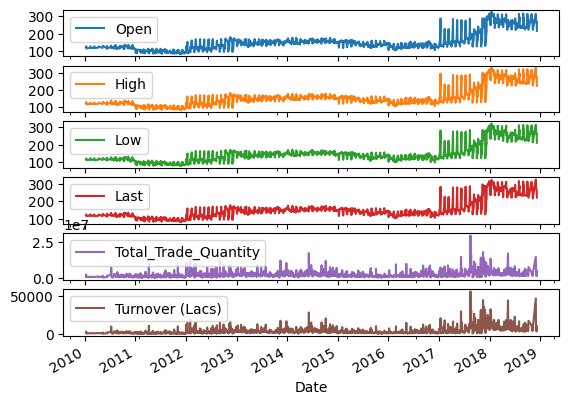

In [ ]:
data.set_index('Date')[['Open','High','Low','Last','Close','Total_Trade_Quantity','Turnover (Lacs)']].plot(subplots=True)

In [ ]:
data.corr()

<ipython-input-45-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Last,Close,Total_Trade_Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total_Trade_Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [ ]:
df1=data.reset_index()['Close']
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

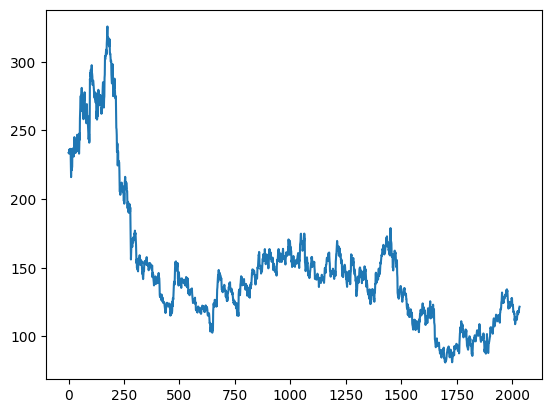

In [ ]:
plt.plot(df1)

LSTM are sensitive to the scale of the data hence we apply MinMax Scaler so that the gradient in LSTM model converge faster.

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

Splitting the dataset in train and test set for training and testing the model

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
print(train_data.shape,test_data.shape)

(1322, 1) (713, 1)


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='Val_loss',patience=2,mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit(X_train,y_train,epochs=30,
                  batch_size=64,
                  validation_data=(X_test,ytest),
                  shuffle=False,
                  callbacks=[early_stopping])


Epoch 1/30
20/20 [==============================] - ETA: 0s - loss: 0.0712 - mean_absolute_error: 0.1526

20/20 [==============================] - 12s 324ms/step - loss: 0.0712 - mean_absolute_error: 0.1526 - val_loss: 0.0017 - val_mean_absolute_error: 0.0330
Epoch 2/30
20/20 [==============================] - ETA: 0s - loss: 0.0152 - mean_absolute_error: 0.0918

20/20 [==============================] - 4s 208ms/step - loss: 0.0152 - mean_absolute_error: 0.0918 - val_loss: 0.0023 - val_mean_absolute_error: 0.0413
Epoch 3/30
20/20 [==============================] - ETA: 0s - loss: 0.0029 - mean_absolute_error: 0.0398

20/20 [==============================] - 4s 206ms/step - loss: 0.0029 - mean_absolute_error: 0.0398 - val_loss: 0.0019 - val_mean_absolute_error: 0.0368
Epoch 4/30
20/20 [==============================] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.0855

20/20 [==============================] - 5s 267ms/step - loss: 0.0091 - mean_absolute_error: 0.0855 - val_loss: 0.0051 - val_mean_absolute_error: 0.0645
Epoch 5/30
20/20 [==============================] - ETA: 0s - loss: 0.0110 - mean_absolute_error: 0.0840

20/20 [==============================] - 4s 208ms/step - loss: 0.0110 - mean_absolute_error: 0.0840 - val_loss: 0.0015 - val_mean_absolute_error: 0.0314
Epoch 6/30
20/20 [==============================] - ETA: 0s - loss: 0.0083 - mean_absolute_error: 0.0663

20/20 [==============================] - 4s 202ms/step - loss: 0.0083 - mean_absolute_error: 0.0663 - val_loss: 0.0011 - val_mean_absolute_error: 0.0279
Epoch 7/30
20/20 [==============================] - ETA: 0s - loss: 0.0037 - mean_absolute_error: 0.0518

20/20 [==============================] - 5s 268ms/step - loss: 0.0037 - mean_absolute_error: 0.0518 - val_loss: 0.0023 - val_mean_absolute_error: 0.0415
Epoch 8/30
20/20 [==============================] - ETA: 0s - loss: 0.0023 - mean_absolute_error: 0.0371

20/20 [==============================] - 4s 197ms/step - loss: 0.0023 - mean_absolute_error: 0.0371 - val_loss: 0.0026 - val_mean_absolute_error: 0.0433
Epoch 9/30
20/20 [==============================] - ETA: 0s - loss: 0.0063 - mean_absolute_error: 0.0620

20/20 [==============================] - 4s 207ms/step - loss: 0.0063 - mean_absolute_error: 0.0620 - val_loss: 7.9514e-04 - val_mean_absolute_error: 0.0226
Epoch 10/30
20/20 [==============================] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0292

20/20 [==============================] - 5s 278ms/step - loss: 0.0017 - mean_absolute_error: 0.0292 - val_loss: 7.4394e-04 - val_mean_absolute_error: 0.0207
Epoch 11/30
20/20 [==============================] - ETA: 0s - loss: 0.0068 - mean_absolute_error: 0.0725

20/20 [==============================] - 4s 209ms/step - loss: 0.0068 - mean_absolute_error: 0.0725 - val_loss: 0.0040 - val_mean_absolute_error: 0.0559
Epoch 12/30
20/20 [==============================] - ETA: 0s - loss: 0.0129 - mean_absolute_error: 0.0902

20/20 [==============================] - 5s 249ms/step - loss: 0.0129 - mean_absolute_error: 0.0902 - val_loss: 0.0012 - val_mean_absolute_error: 0.0272
Epoch 13/30
20/20 [==============================] - ETA: 0s - loss: 0.0050 - mean_absolute_error: 0.0501

20/20 [==============================] - 4s 221ms/step - loss: 0.0050 - mean_absolute_error: 0.0501 - val_loss: 0.0013 - val_mean_absolute_error: 0.0301
Epoch 14/30
20/20 [==============================] - ETA: 0s - loss: 0.0091 - mean_absolute_error: 0.0870

20/20 [==============================] - 4s 200ms/step - loss: 0.0091 - mean_absolute_error: 0.0870 - val_loss: 0.0037 - val_mean_absolute_error: 0.0532
Epoch 15/30
20/20 [==============================] - ETA: 0s - loss: 0.0118 - mean_absolute_error: 0.0865

20/20 [==============================] - 6s 282ms/step - loss: 0.0118 - mean_absolute_error: 0.0865 - val_loss: 0.0012 - val_mean_absolute_error: 0.0277
Epoch 16/30
20/20 [==============================] - ETA: 0s - loss: 0.0037 - mean_absolute_error: 0.0423

20/20 [==============================] - 4s 206ms/step - loss: 0.0037 - mean_absolute_error: 0.0423 - val_loss: 7.1936e-04 - val_mean_absolute_error: 0.0212
Epoch 17/30
20/20 [==============================] - ETA: 0s - loss: 0.0075 - mean_absolute_error: 0.0768

20/20 [==============================] - 4s 211ms/step - loss: 0.0075 - mean_absolute_error: 0.0768 - val_loss: 0.0030 - val_mean_absolute_error: 0.0472
Epoch 18/30
20/20 [==============================] - ETA: 0s - loss: 0.0108 - mean_absolute_error: 0.0838

20/20 [==============================] - 5s 270ms/step - loss: 0.0108 - mean_absolute_error: 0.0838 - val_loss: 0.0011 - val_mean_absolute_error: 0.0262
Epoch 19/30
20/20 [==============================] - ETA: 0s - loss: 0.0020 - mean_absolute_error: 0.0298

20/20 [==============================] - 4s 213ms/step - loss: 0.0020 - mean_absolute_error: 0.0298 - val_loss: 6.9975e-04 - val_mean_absolute_error: 0.0199
Epoch 20/30
20/20 [==============================] - ETA: 0s - loss: 0.0052 - mean_absolute_error: 0.0606

20/20 [==============================] - 4s 213ms/step - loss: 0.0052 - mean_absolute_error: 0.0606 - val_loss: 0.0029 - val_mean_absolute_error: 0.0460
Epoch 21/30
20/20 [==============================] - ETA: 0s - loss: 0.0092 - mean_absolute_error: 0.0769

20/20 [==============================] - 8s 421ms/step - loss: 0.0092 - mean_absolute_error: 0.0769 - val_loss: 8.9390e-04 - val_mean_absolute_error: 0.0238
Epoch 22/30
20/20 [==============================] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0271

20/20 [==============================] - 4s 208ms/step - loss: 0.0015 - mean_absolute_error: 0.0271 - val_loss: 7.7514e-04 - val_mean_absolute_error: 0.0210
Epoch 23/30
20/20 [==============================] - ETA: 0s - loss: 0.0035 - mean_absolute_error: 0.0469

20/20 [==============================] - 5s 266ms/step - loss: 0.0035 - mean_absolute_error: 0.0469 - val_loss: 0.0025 - val_mean_absolute_error: 0.0432
Epoch 24/30
20/20 [==============================] - ETA: 0s - loss: 0.0063 - mean_absolute_error: 0.0640

20/20 [==============================] - 4s 203ms/step - loss: 0.0063 - mean_absolute_error: 0.0640 - val_loss: 7.1041e-04 - val_mean_absolute_error: 0.0209
Epoch 25/30
20/20 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0275

20/20 [==============================] - 4s 218ms/step - loss: 0.0014 - mean_absolute_error: 0.0275 - val_loss: 9.4510e-04 - val_mean_absolute_error: 0.0239
Epoch 26/30
20/20 [==============================] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0341

20/20 [==============================] - 5s 271ms/step - loss: 0.0021 - mean_absolute_error: 0.0341 - val_loss: 0.0022 - val_mean_absolute_error: 0.0398
Epoch 27/30
20/20 [==============================] - ETA: 0s - loss: 0.0038 - mean_absolute_error: 0.0491

20/20 [==============================] - 4s 210ms/step - loss: 0.0038 - mean_absolute_error: 0.0491 - val_loss: 6.3672e-04 - val_mean_absolute_error: 0.0196
Epoch 28/30
20/20 [==============================] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0289

20/20 [==============================] - 4s 222ms/step - loss: 0.0014 - mean_absolute_error: 0.0289 - val_loss: 0.0012 - val_mean_absolute_error: 0.0280
Epoch 29/30
20/20 [==============================] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0272

20/20 [==============================] - 5s 236ms/step - loss: 0.0013 - mean_absolute_error: 0.0272 - val_loss: 0.0017 - val_mean_absolute_error: 0.0346
Epoch 30/30
20/20 [==============================] - ETA: 0s - loss: 0.0021 - mean_absolute_error: 0.0352

20/20 [==============================] - 4s 209ms/step - loss: 0.0021 - mean_absolute_error: 0.0352 - val_loss: 6.3295e-04 - val_mean_absolute_error: 0.0194


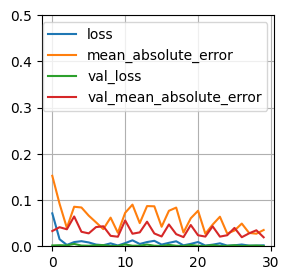

In [ ]:
pd.DataFrame(history.history).plot(figsize=(3,3))
plt.grid(True)
plt.gca().set_ylim(0,0.5)
plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

20/20 [==============================] - 1s 40ms/step


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.03392540058134896

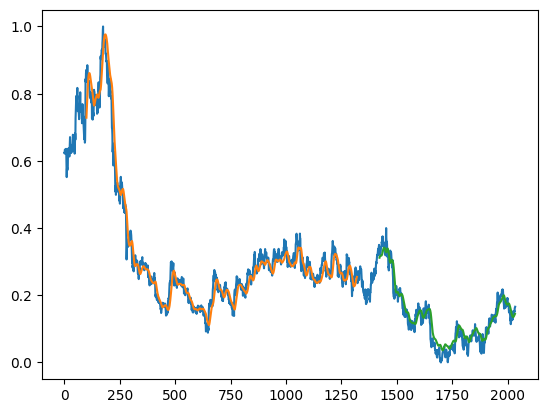

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.14835258]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

2035

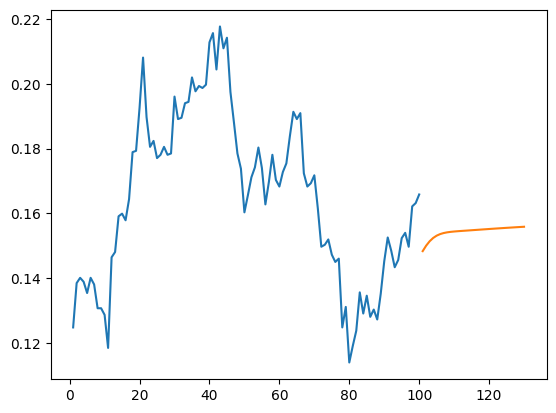

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

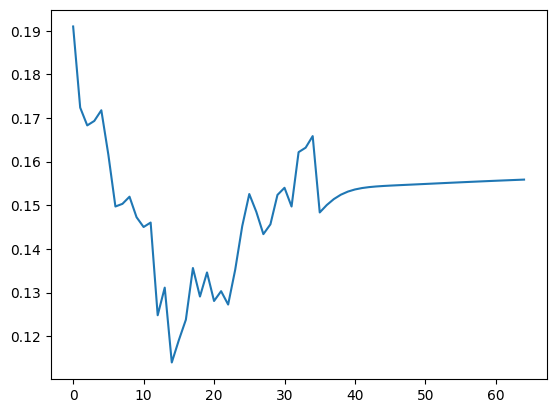

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2000:])

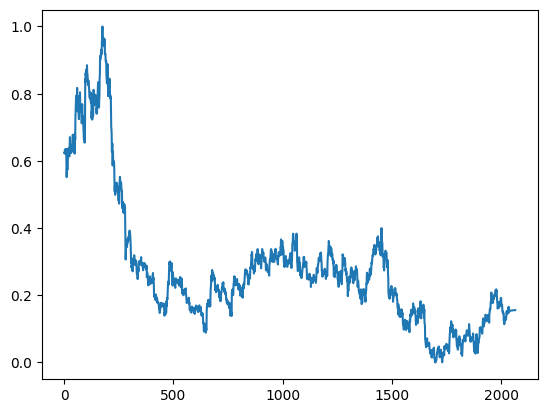

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)